In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from skimage import io

In [2]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

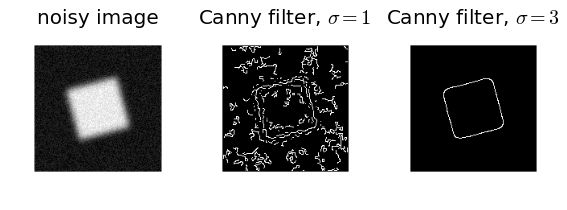

In [3]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

(-0.5, 479.5, 4949.5, -0.5)

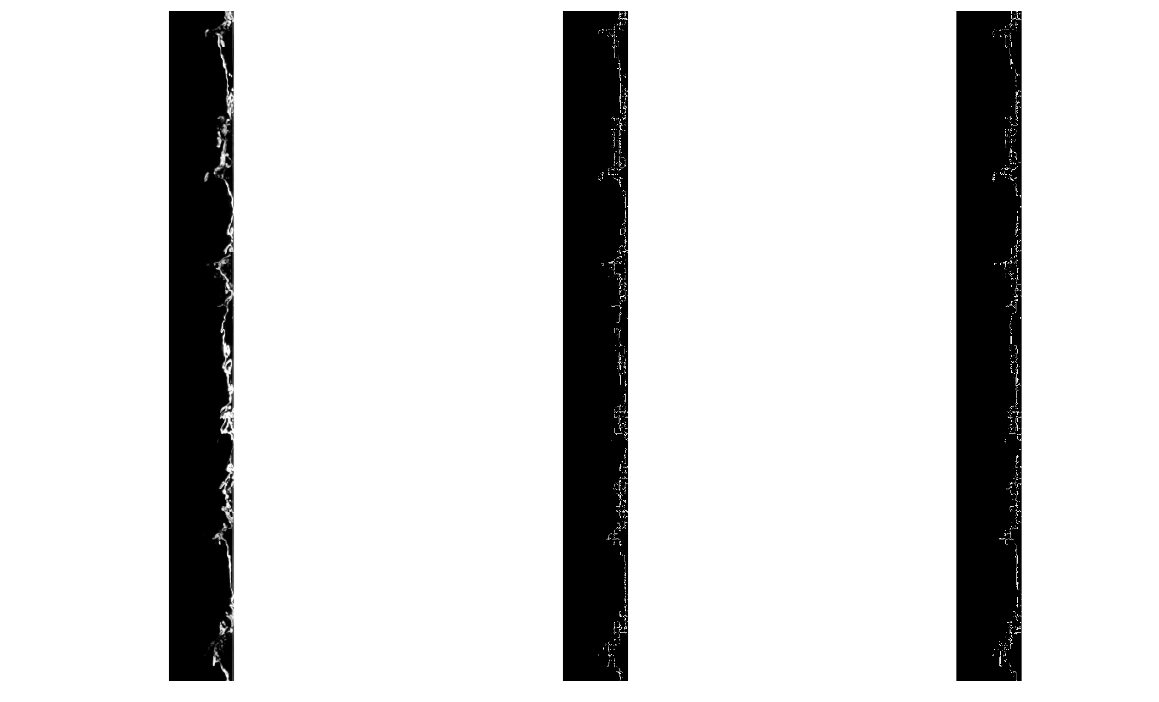

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,12),
                                   sharex=True, sharey=True)
im = color.rgb2gray(io.imread(r'C:\Users\Júlio\Documents\GitHub\image-analysis\images\seqa.png'))
im[:,0:408] = np.zeros((4950,408))
im = im[:,148:628]
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=1.5,low_threshold=0.01,high_threshold=0.15)
ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')

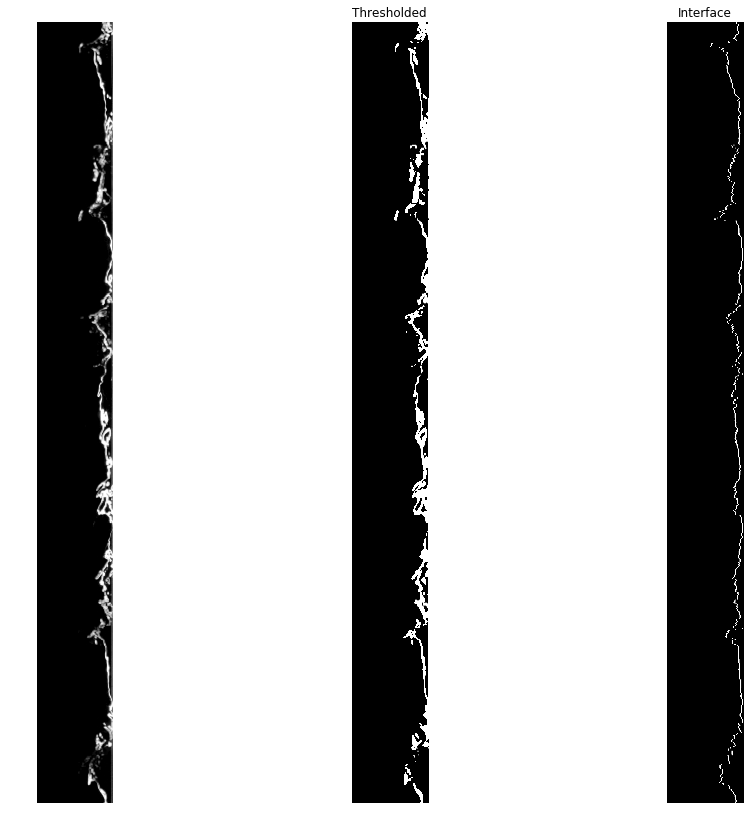

In [67]:
from skimage.filters import threshold_otsu

imcanny = feature.canny(im)
thresh = threshold_otsu(im)
binary = im > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 14))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

ax[2].imshow(new_imm, cmap=plt.cm.gray)
ax[2].set_title('Interface')
ax[2].axis('off')

plt.show()

In [15]:
D = {n: [i for i, j in enumerate(k) if j] for n, k in enumerate(binary)}

C:\Users\Júlio\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


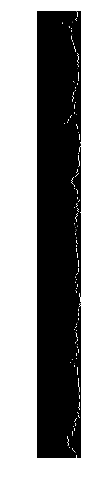

In [65]:
new_imm = np.zeros(im.shape)
for k,v in D.items():
    if v != []:
        new_imm[k,np.floor(np.mean(v))-8:np.floor(np.mean(v))] = 1
    else:
        new_imm[k,:] = new_imm[k-1,:]
figs, axs = plt.subplots(ncols=1, figsize=(12, 8))
axs.imshow(new_imm, cmap=plt.cm.gray)
axs.axis('off')
plt.show()

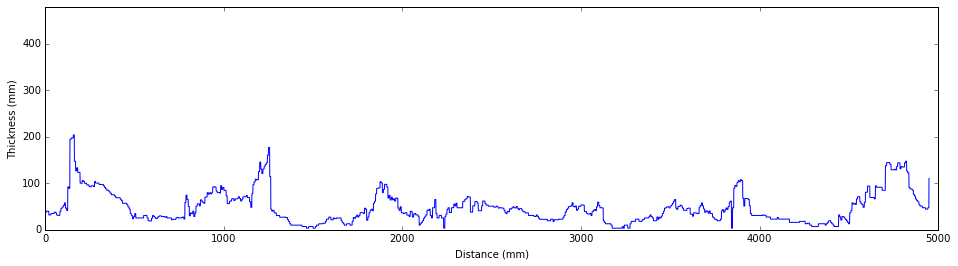

In [77]:
aa = []
for v in D.values():
    if v == []:
        aa.append(aa[-1])
    else:
        aa.append(np.mean(v))

fig,ax = plt.subplots(ncols=1,figsize=(16,4))
ax.plot(480 - np.array(aa))
ax.set_ylim([0,480])
ax.set_ylabel('Thickness (mm)')
ax.set_xlabel('Distance (mm)')